### Data generation

In [6]:
import numpy as np
from numpy import sin, pi
from matplotlib.pyplot import figure, subplot,plot,xlim,title,ylim,xlabel,ylabel
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, windows


#### Step change data

Text(0.5, 0, 'Time (s)')

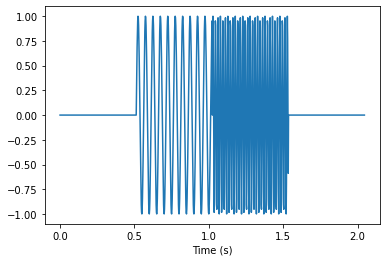

In [8]:
## initialize parameters
samplerate=500 # in Hz
N=1024 # data length

sinefreq1=20 # in Hz
sinefreq2=60 # in Hz

nfft=64     # window size for each segment, 
            # try to use 32 or 16 to investigate the trade off between time and frequency resolution 
noverlap=round(nfft*0.5)  # number of overlapping points (50#)

## generate simulated signals with step changes in frequency
ts=np.arange(N//4)/samplerate  # time axis for each segment
data=np.hstack((np.zeros(N//4),sin(2*pi*sinefreq1*ts),sin(2*pi*sinefreq2*ts),np.zeros(N//4)))

taxis=np.arange(N)/samplerate   # time axis for whole data length

figure() 
plot(taxis,data)
xlabel('Time (s)')


#### Chirp Signal

Text(0.5, 0, 'Time (s)')

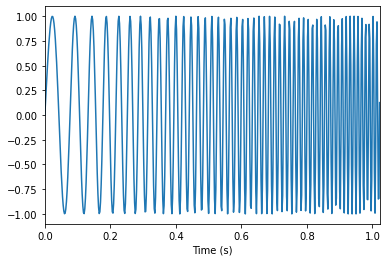

In [13]:
## initialize parameters
samplerate=500 # in Hz
N=512 # data length

fmin=20 # Minimal frequency in Hz
fmax=100 # Maximal frequency in Hz

nfft=32      # window size for each segment
noverlap=round(nfft*0.5)  # number of overlapping points (50#)

## generate a chirp signal
taxis=np.arange(N)/samplerate   # time axis for whole data length

fchirp=np.arange(N)*((fmax-fmin)/N)+fmin
data=sin(pi*taxis*fchirp)    # data=sin(2*pi*taxis.*fchirp)

figure()
plot(taxis,data), xlim(taxis[0], taxis[-1])
xlabel('Time (s)')

### FFT analysis

Text(0, 0.5, 'Spectrum')

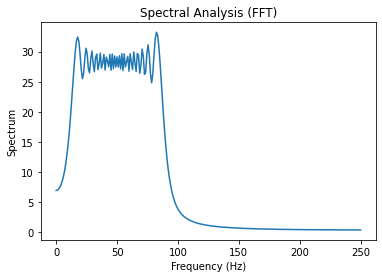

In [18]:
## Spectral analysis (FFT)
data_freq=np.fft.fft(data,N)
Mag=abs(data_freq)
faxis=(samplerate/2)*np.linspace(0,1,N//2)

figure()
plot(faxis,Mag[:N//2]) # represented by dB
title('Spectral Analysis (FFT)')
xlabel('Frequency (Hz)')
ylabel('Spectrum')

### TF analysis using STFT

In [19]:
## calculate spectrogram using STFT
window = windows.hamming(nfft)
faxis,taxis,spec=spectrogram(data,samplerate,window,noverlap=noverlap,nfft=nfft)
Mag=abs(spec)     # get spectrum magnitude



### 3D plot

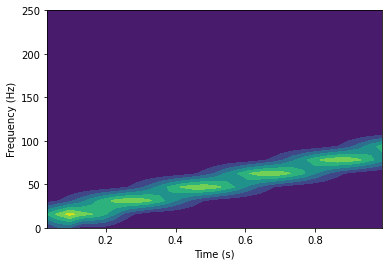

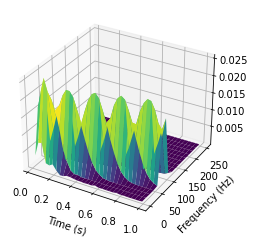

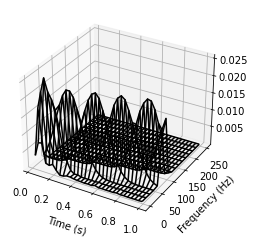

In [20]:
figure()
plt.contourf(taxis,faxis,Mag)   # plot spectrogram as 2D contour
xlabel('Time (s)'),xlim(taxis[0], taxis[-1])
ylabel('Frequency (Hz)')

taxis, faxis = np.meshgrid(taxis,faxis)

figure()
ax = plt.axes(projection='3d')
ax.plot_surface(taxis, faxis, spec,rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
xlabel('Time (s)')
ylabel('Frequency (Hz)')

figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(taxis, faxis, spec, color='black')
xlabel('Time (s)')
ylabel('Frequency (Hz)')

plt.show()
